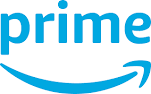

# <p style="text-align: center;"> Retail Data Analytics - Looking For Predictors For Weekly Sales</p>
## <p style="text-align: center;"> Linear regression on historical sales data from 45 stores </p>
#### <p style="text-align: right;"> Made by Ihor Markevych </p>

### Objective of the Project

Let's investigate dataset of sales to get understanding of factors that can predict sales of shops. We'll try to answer questions like if temperature alone can predict sale, check same for fuel price and some other variables. For this we'll build several simple linear regression models and try to predict one row from the dataset, which we would not include in the training dataset. Before doing this we'll investigate data to have initial understanding of what we shoul include in a model.  
  
Next, we'll try to build multiple regression model and figure out, whether some of the variables together can predict sales better.   
  
After doing this we'll check assumptions (which should be done before modeling, but since we have a goal of doing research about linear regression, we can do this after). Those assumptions will give us understanding of whether this data is a good fit for linear regression.

-----------------------
-----------------------

In [1]:
library(psych)

In [2]:
featuresData <- read.csv('./data/Features data set.csv')
salesData <- read.csv('./data/sales data-set.csv')
storesData <- read.csv('./data/stores data-set.csv')

In [3]:
head(featuresData)
head(salesData)
head(storesData)

Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
1,05/02/2010,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE
1,12/02/2010,38.51,2.548,NA,NA,NA,NA,NA,211.2422,8.106,TRUE
1,19/02/2010,39.93,2.514,NA,NA,NA,NA,NA,211.2891,8.106,FALSE
1,26/02/2010,46.63,2.561,NA,NA,NA,NA,NA,211.3196,8.106,FALSE
1,05/03/2010,46.50,2.625,NA,NA,NA,NA,NA,211.3501,8.106,FALSE
1,12/03/2010,57.79,2.667,NA,NA,NA,NA,NA,211.3806,8.106,FALSE


Store,Dept,Date,Weekly_Sales,IsHoliday
1,1,05/02/2010,24924.50,FALSE
1,1,12/02/2010,46039.49,TRUE
1,1,19/02/2010,41595.55,FALSE
1,1,26/02/2010,19403.54,FALSE
1,1,05/03/2010,21827.90,FALSE
1,1,12/03/2010,21043.39,FALSE


Store,Type,Size
1,A,151315
2,A,202307
3,B,37392
4,A,205863
5,B,34875
6,A,202505


### Merge

_we are merging those three datasets by common columns - `Store` for `featuresData` and `storesData` and `Store`, `Date`, `IsHoliday` for newly merged dataset and `salesData`_

In [4]:
sales_all <- merge(featuresData, storesData, by='Store')
sales_all <- merge(sales_all, salesData, by=c('Store', 'Date', 'IsHoliday'))

Let's see which data we got.

In [5]:
head(sales_all)

Store,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Dept,Weekly_Sales
1,01/04/2011,FALSE,59.17,3.524,NA,NA,NA,NA,NA,214.8372,7.682,A,151315,49,13167.85
1,01/04/2011,FALSE,59.17,3.524,NA,NA,NA,NA,NA,214.8372,7.682,A,151315,26,5946.53
1,01/04/2011,FALSE,59.17,3.524,NA,NA,NA,NA,NA,214.8372,7.682,A,151315,81,28545.23
1,01/04/2011,FALSE,59.17,3.524,NA,NA,NA,NA,NA,214.8372,7.682,A,151315,34,9949.54
1,01/04/2011,FALSE,59.17,3.524,NA,NA,NA,NA,NA,214.8372,7.682,A,151315,59,316.86
1,01/04/2011,FALSE,59.17,3.524,NA,NA,NA,NA,NA,214.8372,7.682,A,151315,30,3897.48


_since we don't want Stores and Departments to be interpreted as numbers, we'll convert them to factors_

In [6]:
sales_all[, 'Store'] <- as.factor(sales_all[, 'Store'])
sales_all[, 'Dept'] <- as.factor(sales_all[, 'Dept'])

_and let's extract one row (without NAs) to use for prediction to check our models_

In [7]:
rowToPredict  <- sales_all[72,]
sales_all <- sales_all[-72,]

### Data Exploration

Let's see **how many departments** we have.

In [8]:
cat('We have', length(unique(sales_all[,'Dept'])), 'departments total.')

We have 81 departments total.

Let's see **which types** we have.

In [9]:
unique(sales_all[,'Type'])

[1] A B C
Levels: A B C

We would like to know also **max weekly sale** value.

In [10]:
cat('Max Weekly Sales value is', max(sales_all[,'Weekly_Sales']))

Max Weekly Sales value is 693099.4

Let's check for **covariation**, as this will be useful for our future model.

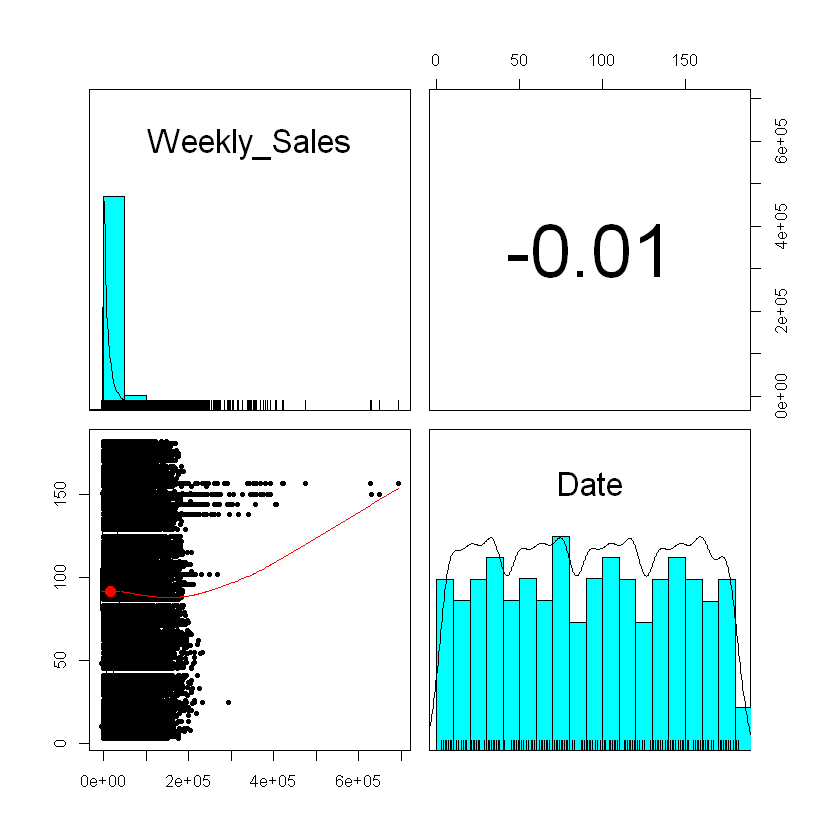

In [11]:
pairs.panels(sales_all[, c('Weekly_Sales', 'Date')])

Weekly Sales almost do not correlate with date. Also, since we are not using timeseries analyse, we won't use Date in our future model.

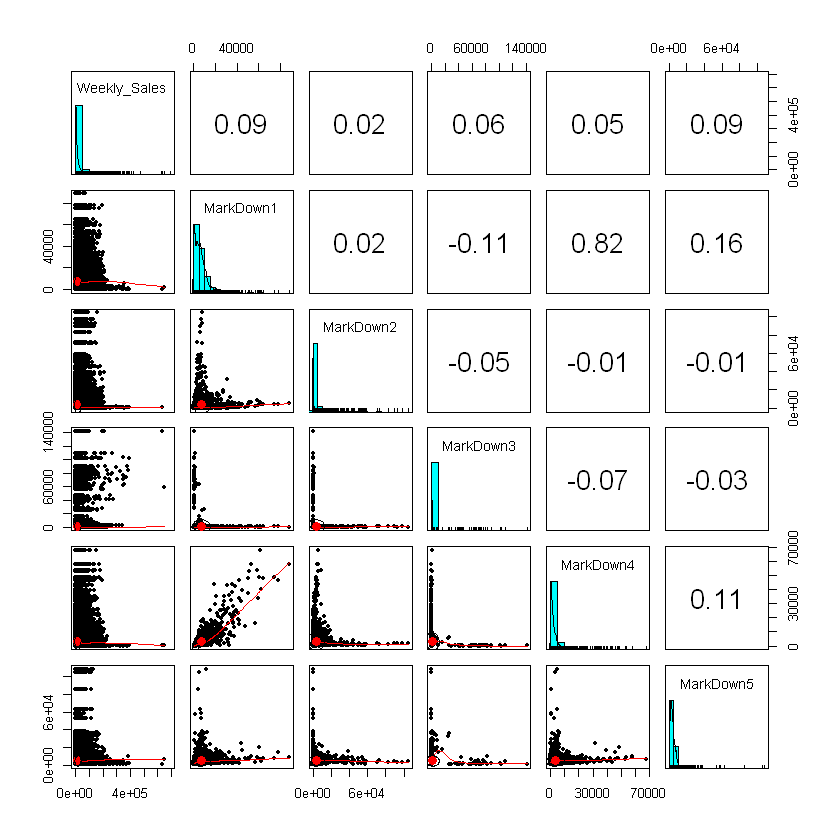

In [12]:
pairs.panels(sales_all[, c('Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5')])

Weekly Sales correlate with MarkDowns a bit.

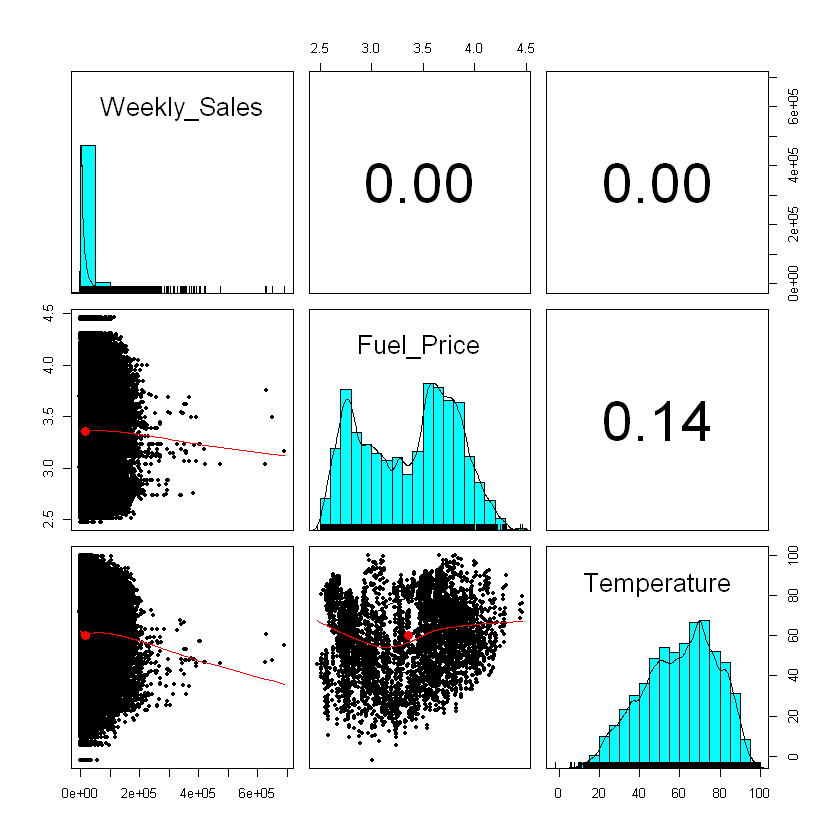

In [13]:
pairs.panels(sales_all[, c('Weekly_Sales', 'Fuel_Price', 'Temperature')])

Weekly sales do not correlate with Fuel_Price and Temperature.

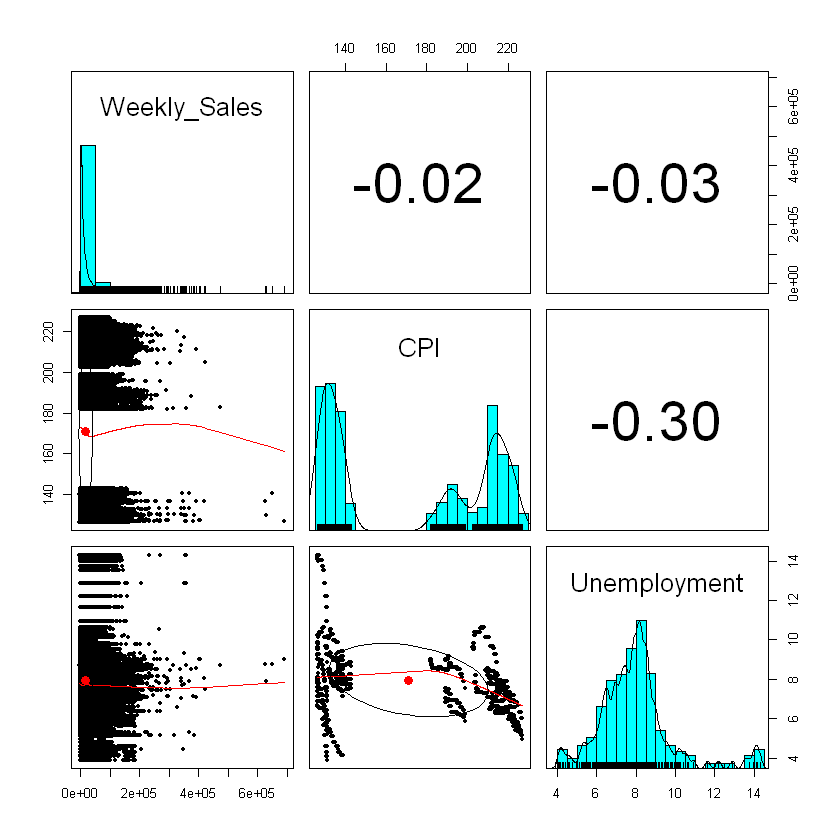

In [14]:
pairs.panels(sales_all[, c('Weekly_Sales', 'CPI', 'Unemployment')])

Weekly sales are almost non-correlated with CPI and Unemployment.

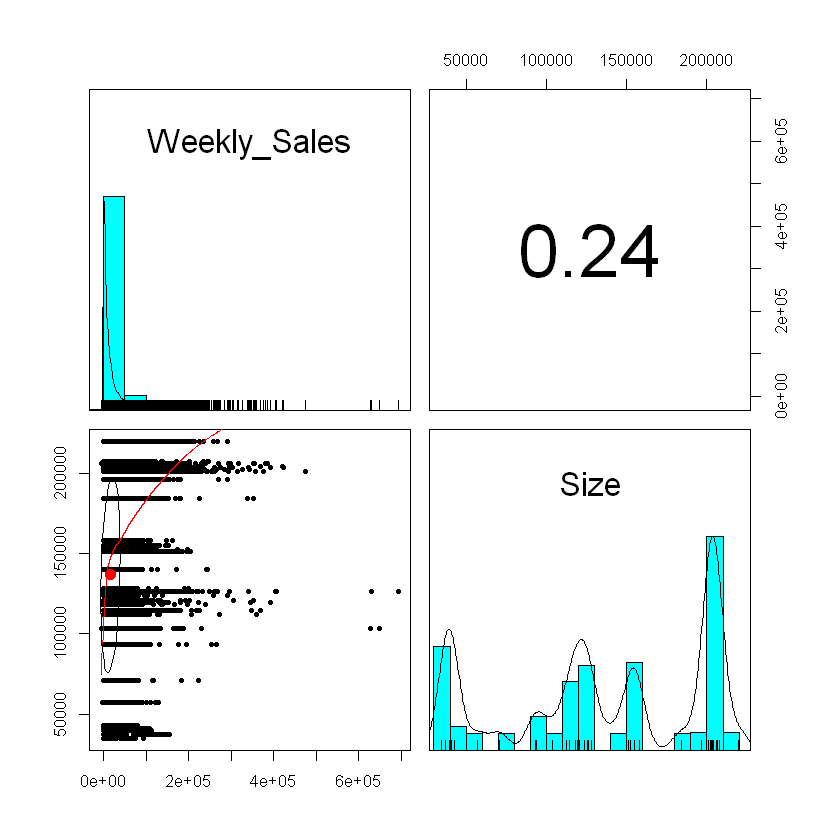

In [15]:
pairs.panels(sales_all[, c('Weekly_Sales', 'Size')])

Weekly sales are quite correlated with size!

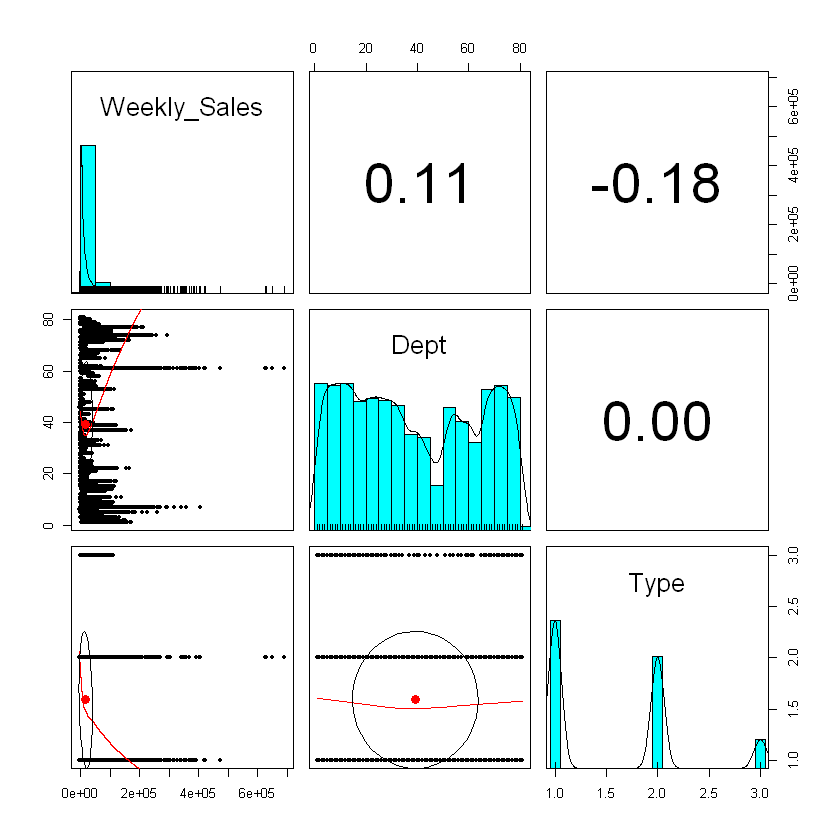

In [16]:
pairs.panels(sales_all[, c('Weekly_Sales', 'Dept', 'Type')])

Sales are quite correlated with department number and with type.

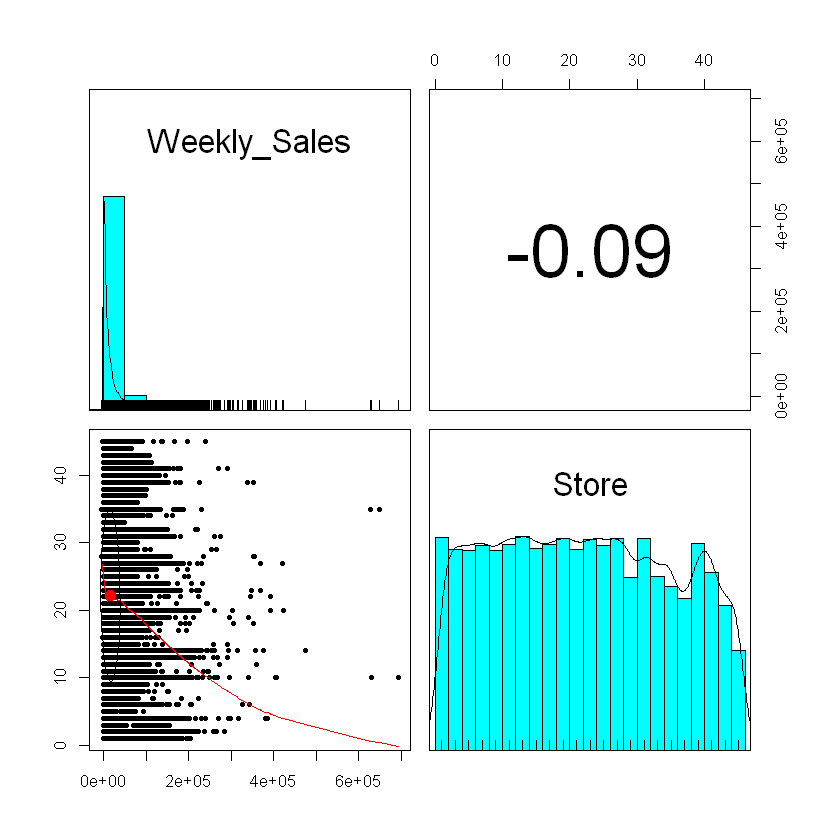

In [17]:
pairs.panels(sales_all[, c('Weekly_Sales', 'Store')])

Sales and Store number is a bit correlated.

### Simple Linear Regression

#### Model 1
Model1 will contain Size as predictor.

In [18]:
model1 <- lm(Weekly_Sales ~ Size, data = sales_all) 

In [19]:
summary(model1)


Call:
lm(formula = Weekly_Sales ~ Size, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-27288 -12872  -6620   4283 678046 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.565e+03  8.328e+01   42.81   <2e-16 ***
Size        9.081e-02  5.563e-04  163.24   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22030 on 421567 degrees of freedom
Multiple R-squared:  0.05945,	Adjusted R-squared:  0.05945 
F-statistic: 2.665e+04 on 1 and 421567 DF,  p-value: < 2.2e-16


In [20]:
predict.lm(model1, rowToPredict, interval = "predict")
cat('Real value is', rowToPredict$Weekly_Sales)

,fit,lwr,upr
72,17305.85,-25864,60475.7


Real value is 41039.74

Looks like this model is not really good, due to low Adjusted R-squared and bad prediction accuracy.

$$Weekly\_Sales = 3.565e^{03} + 9.081e^{02}*Size$$
This means that due to this model increase in size by one point will result in increase of sales for $9.081e^{02}$.

#### Model 2
Model2 will contain Temperature as predictor.

In [21]:
model2 <- lm(Weekly_Sales ~ Temperature, data = sales_all) 

In [22]:
summary(model2)


Call:
lm(formula = Weekly_Sales ~ Temperature, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-20937 -13906  -8368   4224 677105 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16152.453    119.184 135.525   <2e-16 ***
Temperature    -2.850      1.896  -1.503    0.133    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22710 on 421567 degrees of freedom
Multiple R-squared:  5.359e-06,	Adjusted R-squared:  2.987e-06 
F-statistic: 2.259 on 1 and 421567 DF,  p-value: 0.1328


In [23]:
predict.lm(model2, rowToPredict, interval = "predict")
cat('Real value is', rowToPredict$Weekly_Sales)

,fit,lwr,upr
72,15930.3,-28582.96,60443.55


Real value is 41039.74

Looks like this model is even worse, due to low Adjusted R-squared and bad prediction accuracy.

$$Weekly\_Sales = 16152.325 -2.847*Temperature$$
This means that due to this model increase in Temperature by one point will result in decrease of sales for $2.850$.

#### Model 3
Model3 will be based on CPI.

In [24]:
model3 <- lm(Weekly_Sales ~ CPI, data = sales_all) 

In [25]:
summary(model3)


Call:
lm(formula = Weekly_Sales ~ CPI, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-21515 -13842  -8358   4224 676578 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18058.8600   156.8407  115.14   <2e-16 ***
CPI           -12.1357     0.8931  -13.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22710 on 421567 degrees of freedom
Multiple R-squared:  0.0004378,	Adjusted R-squared:  0.0004355 
F-statistic: 184.7 on 1 and 421567 DF,  p-value: < 2.2e-16


In [26]:
predict.lm(model3, rowToPredict, interval = "predict")
cat('Real value is', rowToPredict$Weekly_Sales)

,fit,lwr,upr
72,15367.79,-29135.87,59871.46


Real value is 41039.74

Again, this model is very bad.

$$Weekly\_Sales = 18058.5772 -12.1337*CPI$$
This means that due to this model increase in CPI by one point will result in decrease of sales for $12.1337$.

#### Model 4
Model4 is based on Unemployment.

In [27]:
model4 <- lm(Weekly_Sales ~ Unemployment, data = sales_all) 

In [28]:
summary(model4)


Call:
lm(formula = Weekly_Sales ~ Unemployment, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-19677 -13872  -8376   4244 677447 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18490.53     153.42   120.5   <2e-16 ***
Unemployment  -315.23      18.77   -16.8   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22700 on 421567 degrees of freedom
Multiple R-squared:  0.0006689,	Adjusted R-squared:  0.0006665 
F-statistic: 282.2 on 1 and 421567 DF,  p-value: < 2.2e-16


In [29]:
predict.lm(model4, rowToPredict, interval = "predict")
cat('Real value is', rowToPredict$Weekly_Sales)

,fit,lwr,upr
72,16238.83,-28259.61,60737.28


Real value is 41039.74

This model is also bad.

$$Weekly\_Sales = 18490.7 -315.25*Unemployment$$
This means that due to this model increase in Unemployment by one point will result in decrease of sales for $315.25$.

#### Model 5
Model5 is based on Fuel prices.

In [30]:
model5 <- lm(Weekly_Sales ~ Fuel_Price, data = sales_all) 
summary(model5)


Call:
lm(formula = Weekly_Sales ~ Fuel_Price, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-20972 -13901  -8368   4225 677117 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16001.358    258.779  61.834   <2e-16 ***
Fuel_Price     -5.998     76.287  -0.079    0.937    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22710 on 421567 degrees of freedom
Multiple R-squared:  1.466e-08,	Adjusted R-squared:  -2.357e-06 
F-statistic: 0.006182 on 1 and 421567 DF,  p-value: 0.9373


In [31]:
predict.lm(model5, rowToPredict, interval = "predict")
cat('Real value is', rowToPredict$Weekly_Sales)

,fit,lwr,upr
72,15980.36,-28532.97,60493.69


Real value is 41039.74

And it is stil very bad.

$$Weekly\_Sales = 16001.285 - 5.958*Fuel\_Price$$
This means that due to this model increase in Fuel Price by one point will result in decrease of sales for $5.958$.

#### Model 6
Model6 is different, as it works on categorical binary variable IsHoliday.

In [32]:
model6 <- lm(Weekly_Sales ~ IsHoliday, data = sales_all) 
summary(model6)


Call:
lm(formula = Weekly_Sales ~ IsHoliday, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-20890 -13897  -8356   4225 676064 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   15901.38      36.28 438.351   <2e-16 ***
IsHolidayTRUE  1134.44     136.76   8.295   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22710 on 421567 degrees of freedom
Multiple R-squared:  0.0001632,	Adjusted R-squared:  0.0001608 
F-statistic: 68.81 on 1 and 421567 DF,  p-value: < 2.2e-16


In [33]:
predict.lm(model6, rowToPredict, interval = "predict")
cat('Real value is', rowToPredict$Weekly_Sales)

,fit,lwr,upr
72,15901.38,-28608.31,60411.08


Real value is 41039.74

This one is still very bad.

$$Weekly\_Sales = 15901.45 - 1134.38*(IsHoliday == TRUE)$$
This means that due to this model on holidays sales are decreasing by $1134.38$.

### Model Comparison

Model 1 explains 5.9% of the variation in the `Weekly_Sales` variable around its mean.
Models 2-6 doesn't explain almost anything, however, model 6, which is based on binary `IsHoliday`, is better than models 2-5. based on adjusted $R^2$ value.
  
Model 1 is the best one from those six, but all of them are quite bad. Which was easily to predict from very low correlation levels. Looks like only `Size` can be at least a bit helpful in prediction of `Weekly_Sales`.  
`Fuel_Price`, `Temperature`, `CPI` and `Unemployment`(surprisingly) can't be really used to predict `Weekly_Sales`.

_I have considered using `anova(model1, model2)`, but this will work only if we'll add more parameters too model2 comparing to model1. so, my comparison was based on adjusted $R^2$ values_

### Multiple Linear Regression

Let's take IsHoliday, Size, Type and Department as variables for the model.

In [40]:
model <- lm(Weekly_Sales ~ IsHoliday + Size + Type + Store + Dept, 
            data = sales_all) 
summary(model)


Call:
lm(formula = Weekly_Sales ~ IsHoliday + Size + Type + Store + 
    Dept, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-61291  -5830   -508   5025 629719 

Coefficients: (3 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -8.629e+05  2.964e+04 -29.112  < 2e-16 ***
IsHolidayTRUE  1.209e+03  8.013e+01  15.083  < 2e-16 ***
Size           5.879e+00  1.959e-01  30.012  < 2e-16 ***
TypeB          1.837e+05  6.485e+03  28.332  < 2e-16 ***
TypeC          6.343e+05  2.171e+04  29.211  < 2e-16 ***
Store2        -2.946e+05  9.990e+03 -29.491  < 2e-16 ***
Store3         4.696e+05  1.583e+04  29.659  < 2e-16 ***
Store4        -3.132e+05  1.069e+04 -29.310  < 2e-16 ***
Store5         4.830e+05  1.633e+04  29.584  < 2e-16 ***
Store6        -3.008e+05  1.003e+04 -29.994  < 2e-16 ***
Store7         2.761e+05  9.308e+03  29.660  < 2e-16 ***
Store8        -3.110e+04  7.606e+02 -40.889  < 2e-16 ***
Store9        -4.802e

In [42]:
predict.lm(model, rowToPredict, interval = "predict")
cat('Real value is', rowToPredict$Weekly_Sales)

Warning message in predict.lm(model, rowToPredict, interval = "predict"):
"prediction from a rank-deficient fit may be misleading"

,fit,lwr,upr
72,37623.47,11546.37,63700.57


Real value is 41039.74

Let's take all MarkDowns as predictors.

In [43]:
model <- lm(Weekly_Sales ~ MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5, data = sales_all) 
summary(model)


Call:
lm(formula = Weekly_Sales ~ MarkDown1 + MarkDown2 + MarkDown3 + 
    MarkDown4 + MarkDown5, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-40799 -14670  -8984   4895 592607 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.516e+04  1.339e+02 113.242  < 2e-16 ***
MarkDown1    1.357e-01  1.537e-02   8.830  < 2e-16 ***
MarkDown2    5.107e-02  7.869e-03   6.490 8.62e-11 ***
MarkDown3    1.622e-01  7.273e-03  22.299  < 2e-16 ***
MarkDown4   -4.298e-02  1.973e-02  -2.179   0.0293 *  
MarkDown5    2.236e-01  1.217e-02  18.372  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24610 on 97049 degrees of freedom
  (324514 observations deleted due to missingness)
Multiple R-squared:  0.009908,	Adjusted R-squared:  0.009857 
F-statistic: 194.2 on 5 and 97049 DF,  p-value: < 2.2e-16


In [44]:
predict.lm(model, rowToPredict, interval = "predict")
cat('Real value is', rowToPredict$Weekly_Sales)

,fit,lwr,upr
72,16864.92,-31370.64,65100.49


Real value is 41039.74

Let's take IsHoliday, Size, Type and Department, Fuel Price, MarkDown2-5 as variables for the model.

In [34]:
model <- lm(Weekly_Sales ~ IsHoliday + Size + CPI 
            + Unemployment + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5
            + Fuel_Price + Type + Store + Dept, 
            data = sales_all) 
summary(model)


Call:
lm(formula = Weekly_Sales ~ IsHoliday + Size + CPI + Unemployment + 
    MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + Fuel_Price + 
    Type + Store + Dept, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-71998  -6106   -658   4990 546884 

Coefficients: (3 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -3.784e+06  7.737e+05  -4.891 1.00e-06 ***
IsHolidayTRUE  7.490e+02  1.812e+02   4.134 3.57e-05 ***
Size           2.569e+01  5.198e+00   4.942 7.74e-07 ***
CPI           -3.317e+02  6.352e+01  -5.222 1.77e-07 ***
Unemployment   1.139e+03  1.764e+02   6.454 1.10e-10 ***
MarkDown2     -7.923e-02  5.373e-03 -14.747  < 2e-16 ***
MarkDown3      7.417e-02  4.905e-03  15.121  < 2e-16 ***
MarkDown4     -3.509e-02  6.524e-03  -5.379 7.51e-08 ***
MarkDown5     -1.184e-02  7.722e-03  -1.533 0.125390    
Fuel_Price    -2.944e+03  2.582e+02 -11.400  < 2e-16 ***
TypeB          8.279e+05  1.704e+05   4.860 1.18

In [35]:
predict.lm(model, rowToPredict, interval = "predict")
cat('Real value is', rowToPredict$Weekly_Sales)

Warning message in predict.lm(model, rowToPredict, interval = "predict"):
"prediction from a rank-deficient fit may be misleading"

,fit,lwr,upr
72,40610.15,13219.9,68000.4


Real value is 41039.74

In [36]:
cat('This prediction is', (41039.74 - 40610.15) / 41039.74 * 100, '% accurate!')

This prediction is 1.046766 % accurate!

This model is much better than simple regression models and better than previous multiple regression models (comparing by adjusted $R^2$ and prediction accuracy, since previous two models have values of adjusted $R^2$ 0.009857 and 0.6569).  
This model has adjusted $R^2$ of 0.6811.   
Predicted value is very close to actual value.   
This model explains around 68% of variance.

### Assumptions:

##### Linearity
As it is not very likely to have linear dependency for any of the variables and weekly sales, we would still assume this for research purposes.  
  
#####  Independence  
Variables that will be used in Multiple Linear Regression are quite obviously independant, as there is no reason to believe that e.g. fuel price and temperature may be directly connected. (Not taking into account butterfly effect from chaos theory).

##### Normality

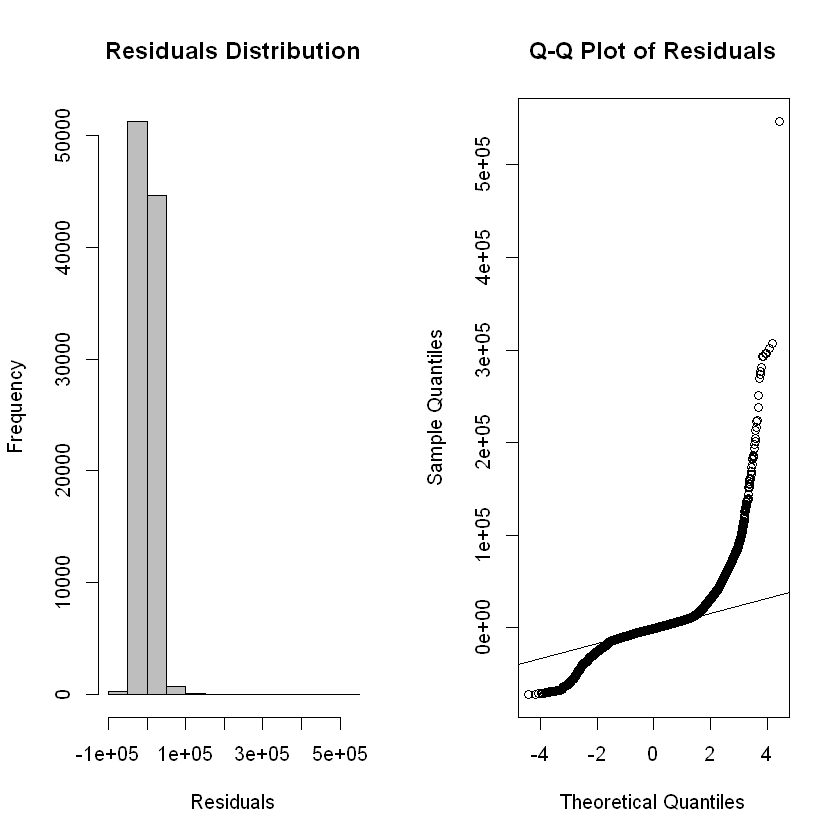

In [37]:
par(mfrow = c(1, 2)) 
hist(model$residuals, xlab = "Residuals", col = "gray", 
     main = "Residuals Distribution") 
qqnorm(model$residuals, main = "Q-Q Plot of Residuals") 
qqline(model$residuals)

From the chart above looks like assumption is violated... But still, for the research purpose we'll investigate the model.

##### Equal variance


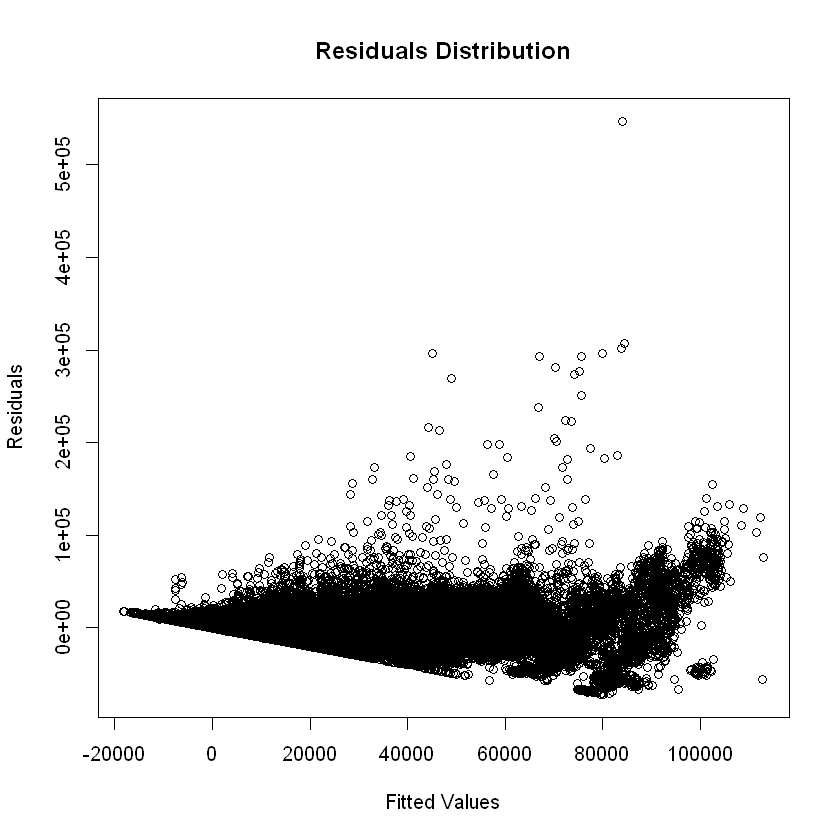

In [38]:
plot(model$fitted.values, model$residuals, ylab = "Residuals", 
     xlab = "Fitted Values", main="Residuals Distribution") 

From the chart above looks like assumption is also violated... But again, for the research purpose we'll investigate the model.

### Summary

We have investigated covariance of different variable to find the most appropriate ones. We have done some initial investigation to have better understanding of data before modeling.

We have found that separate values can not be used to predict weekly sales. However, next formula of multiple regression describes data with quite good accuracy:  
  
$$Weekly\_Sales = IsHoliday + Size + CPI + Unemployment + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5 + Fuel_Price + Type + Store + Dept$$  
  
It has adjusted $R^2$ of 0.6811. This means that interaction effects are very important for this data.  
  
We tested this model on one of the row from original dataset (which we have exluded from training set in advance).
However, most of the assumptions were violated, but even despite this model gave 1% accurate prediction.

### Recommendations

Considering model and its coefficients, we can say that
- some departments perform much better than another ones,
    - for instance, departments 72 and 56 are good,
    - while department 81 does not give good results.
- holidays are also good for sales,
- size of stores is important for sales,
- unemployment has postive effect on sales,
    - since people have more time to browse and buy.
- the consumer price index has negative impact on sales.
  
Model that we got can be used for testing new stores and departments.
Also, Amazon can check how holidays will impact on sales.
This model can be used to check whether it makes sense to open new one, or not.